<a href="https://colab.research.google.com/github/inuinana/pytorch_practice/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


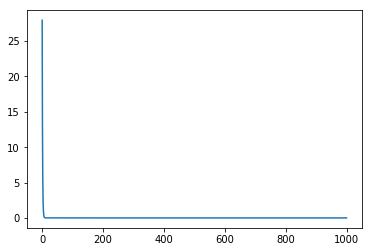

prediction : when x=4, y=8.000046730041504


In [10]:
# Akihiro Inui 2019 June

# Import librarries
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt

# Define data
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

class LinearRegression(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        # Init
        super(LinearRegression, self).__init__()
        # Linear regression
        self.linear = torch.nn.Linear(1, 1)  # (input_size, output_size)
        self.loss_function = torch.nn.MSELoss(size_average=False)
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred
      
    def train(self, visualize=None):
        """
        Training
        """

        # To store loss
        loss_history = []
        
        # Itr for 700 times
        for epoch in range(1000):
           # Forward pass: Compute predicted y by passing x to the model
            y_pred = model(x_data)

            # Compute loss and append it to history
            loss = self.loss_function(y_pred, y_data)
            loss_history.append(loss.data)

            # Zero gradients, perform a backward pass, and update the weights.
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
        # Plot loss history
        if visualize==True:
          plt.plot(loss_history)
          plt.show()
      
      
# main
if __name__ == "__main__":
  
    # Instantiate model
    model = LinearRegression()

    # Train model
    model.train(visualize=True)

    # Make prediction
    test_data = Variable(torch.Tensor([[4.0]]))
    prediction = model(test_data)
    print("prediction : when x={0}, y={1}".format(4, model( test_data).item()))
